In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
def create_random_minibatches(x,y,mini_batch_size):
    n_x=x.shape[0]
    m=x.shape[1]
    perm=list(np.random.permutation(m))
    minibatches=[]
    num_total_minibatches=m//mini_batch_size
    x=x[:,perm]
    y=y[:,perm]
    for i in range (num_total_minibatches):
        minibatch_x=x[:,i*mini_batch_size:(i+1)*mini_batch_size]
        minibatch_y=y[:,i*mini_batch_size:(i+1)*mini_batch_size]
        minibatch=(minibatch_x,minibatch_y)
        minibatches.append(minibatch)
    if m>num_total_minibatches*mini_batch_size:
        minibatch_x=x[:,num_total_minibatches*mini_batch_size:m]
        minibatch_y=y[:,num_total_minibatches*mini_batch_size:m]
        minibatch=(minibatch_x,minibatch_y)
        minibatches.append(minibatch)
    return minibatches

In [15]:
def create_placeholders(n_x,n_y):
    x=tf.placeholder(tf.float32,[n_x,None])
    y=tf.placeholder(tf.float32,[n_y,None])
    return x,y

In [16]:
def initialize_params(ld):
    num_layers=len(ld)-1
    parameters={}
    for i in range(num_layers):
        w_num=str("w"+str(i+1))
        b_num=str("b"+str(i+1))
        parameters["w"+str(i+1)]=tf.get_variable(w_num,(ld[i+1],ld[i]),initializer=tf.contrib.layers.xavier_initializer(seed=0))
        parameters["b"+str(i+1)]=tf.get_variable(b_num,(ld[i+1],1),initializer=tf.zeros_initializer())
    return parameters

In [17]:
def forward_prop(x,parameters):
    layers=len(parameters)//2
    z=x
    for i in range(layers):
        z=tf.add((tf.matmul(parameters["w"+str(i+1)],z)),parameters["b"+str(i+1)])
        z=tf.nn.relu(z)
    return z

In [18]:
def compute_cost(logits,labels):
    logits=tf.transpose(logits)
    labels=tf.transpose(labels)
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    return cost

In [54]:
def train(x,y,ld,learning_rate=0.01,epochs=20,mini_batch_size=32):
    m=x.shape[1]
    n_x=x.shape[0]
    n_y=y.shape[0]
    X,Y=create_placeholders(n_x,n_y)
    parameters=initialize_params(ld)
    Z=forward_prop(X,parameters)
    cost=compute_cost(Z,Y)
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    costs=[]
    init=tf.global_variables_initializer()
    sess=tf.Session()
    sess.run(init)
    for i in range(epochs):
        epoch_cost=0
        num_mini_batches=m//mini_batch_size
        mini_batches=create_random_minibatches(x,y,mini_batch_size)
        for mini_batch in mini_batches:
            (minibatch_x,minibatch_y)=mini_batch
            _,c=sess.run([optimizer,cost],feed_dict={X:minibatch_x,Y:minibatch_y})
            epoch_cost+=c/num_mini_batches
        if i%2==0:
            costs.append(epoch_cost)
            print("cost after "+str(i)+"th epoch: "+str(epoch_cost))
    plt.plot(np.squeeze(costs))
    plt.xlabel('epochs in 10s')
    plt.ylabel('cost')
    plt.title('cost vs epochs')
    params=sess.run(parameters)
    return params

In [20]:
def forward_propagation(x,parameters):
    z=x
    layers=len(parameters)//2
    for i in range(layers):
        z=np.sum((np.matmul(parameters["w"+str(i+1)],z)),paramters["b"+str(i+1)])
        z=np.maximum(z,0)
    return z

In [52]:
df=pd.read_csv('./datasets/fashion-mnist_train.csv')
train_data=df.as_matrix()
xtr=train_data[:,1::]
ytr=train_data[:,0].reshape(60000,1)
print(xtr.shape)
print(ytr.shape)
ytr=ytr.T
xtr=xtr.T
print(xtr.shape)
print(ytr.shape)
ytroh=tf.one_hot(ytr,10,axis=0)
sess=tf.Session()
ytroh=sess.run(ytroh).reshape(10,60000)
print(ytroh.shape)

(60000, 784)
(60000, 1)
(784, 60000)
(1, 60000)
(10, 60000)


In [43]:
a=np.array([[1,1,2,2,9]])
print(a.shape)
a=tf.one_hot(a,10,axis=0)
with tf.Session() as sess:
    a=sess.run(a)
    a=a.reshape(10,5)
print(a)

(1, 5)
[[0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


cost after 0th epoch: 143.50795139999394
cost after 2th epoch: 2.3025259390513364
cost after 4th epoch: 2.3025204179128274
cost after 6th epoch: 2.3025141549428567
cost after 8th epoch: 2.3025107762654886
cost after 10th epoch: 2.3025096781413024
cost after 12th epoch: 2.302509237289455
cost after 14th epoch: 2.302509010569281
cost after 16th epoch: 2.3025088745117452
cost after 18th epoch: 2.30250878410342


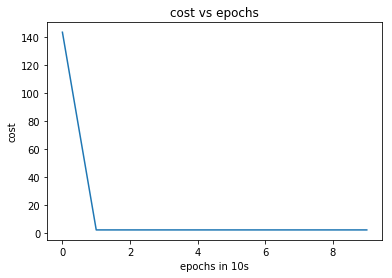

In [55]:
ld=[784,50,10]
tf.reset_default_graph()
parameters=train(xtr,ytroh,ld)